In [5]:
import numpy as np
import matplotlib.pyplot as plt

$$
V(\phi, \chi)=\lambda_\phi(\phi^2-v^2)^2+\frac{1}{2}m_\chi^2 \chi^2+\lambda_\chi \chi^4+\lambda_{\phi\chi}\phi^2 \chi^2+aT^2\phi^2+bT^2\chi^2
$$

In [6]:
# Masas y parámetros del modelo físico
mh = 125                # Masa del Higgs (GeV)
v0 = 246.22             # Valor esperado del vacío (VEV) del Higgs (GeV)
lam_phi = mh**2/(2*v0**2)  # Constante de acoplamiento del campo Higgs (λφ)
lam_phi_chi = 0.5       # Constante de acoplamiento entre Higgs y materia oscura (λφχ)
lam_chi = 0.1           # Constante de acoplamiento del campo de materia oscura (λχ)
g = 0.652               # Constante de acoplamiento SU(2)_L (g)
gprime = 0.357          # Constante de acoplamiento U(1)_Y (g')
y_t = 0.99              # Acoplamiento de Yukawa del quark top (y_t)
m_DM = 80               # Masa de la materia oscura (GeV)

In [7]:
# Masa efectiva del campo χ
mu_chi = m_DM**2 - lam_phi_chi*v0**2  # Término de masa cuadrática para χ

In [8]:
# Coeficientes de temperatura efectivos
a = (9*g**2 + 3*gprime**2 + 12*y_t**2 + 12*lam_phi + 4*lam_phi_chi)/48
b = (lam_phi_chi + 3*lam_chi)/12

In [9]:
N = 100                 # Número de sitios en la red (tamaño del sistema)
N_steps = 25000         # Número de pasos de Monte Carlo por temperatura
delta = 0.1             # Tamaño del paso para actualizaciones de campo
np.random.seed(6)       # Semilla para reproducibilidad

In [10]:
def potential(phi, chi, T):
    """
    Calcula el potencial efectivo a temperatura finita para los campos φ y χ.
    
    Parámetros:
        phi (float): Valor del campo Higgs φ
        chi (float): Valor del campo de materia oscura χ
        T (float): Temperatura actual
        
    Retorna:
        float: Valor del potencial efectivo V(φ,χ,T)
        
    El potencial incluye:
    1. Término de Higgs (φ⁴) con simetría rota
    2. Término de masa para χ
    3. Autoacople de χ (χ⁴)
    4. Acople cruzado φ²χ²
    5. Correcciones térmicas cuadráticas para ambos campos
    """
    return (lam_phi * (phi**2 - v0**2)**2 + 
            0.5 * mu_chi * chi**2 + 
            lam_chi * chi**4 + 
            lam_phi_chi * phi**2 * chi**2 + 
            (a*T*phi)**2 + (b*T*chi)**2)


In [11]:
def metropolis_hastings(phi, chi, T):
    """
    Implementa el algoritmo Metropolis-Hastings para simular la evolución de los campos.
    
    Parámetros:
        phi (array): Array con los valores del campo φ en cada sitio de la red
        chi (array): Array con los valores del campo χ en cada sitio de la red
        T (float): Temperatura actual
        
    Retorna:
        tuple: (phi, chi) arrays actualizados después de N_steps pasos de Monte Carlo
        
    El algoritmo:
    1. Realiza N_steps actualizaciones globales
    2. Para cada sitio de la red:
       - Propone un nuevo valor para φ y lo acepta/rechaza según la probabilidad de Boltzmann
       - Propone un nuevo valor para χ con el mismo criterio
    """
    for _ in range(N_steps):
        for i in range(N):
            # Actualización del campo φ
            phi_old = phi[i]
            phi_new = phi_old + np.random.uniform(-delta, delta)
            delta_S_phi = potential(phi_new, chi[i], T) - potential(phi_old, chi[i], T)
            if delta_S_phi < 0 or np.random.uniform(0,1) < np.exp(-delta_S_phi):
                phi[i] = phi_new
            
            # Actualización del campo χ
            chi_old = chi[i]
            chi_new = chi_old + np.random.uniform(-delta, delta)
            delta_S_chi = potential(phi[i], chi_new, T) - potential(phi[i], chi_old, T)
            if delta_S_chi < 0 or np.random.uniform(0,1) < min(1, np.exp(-delta_S_chi)):
                chi[i] = chi_new
    return phi, chi

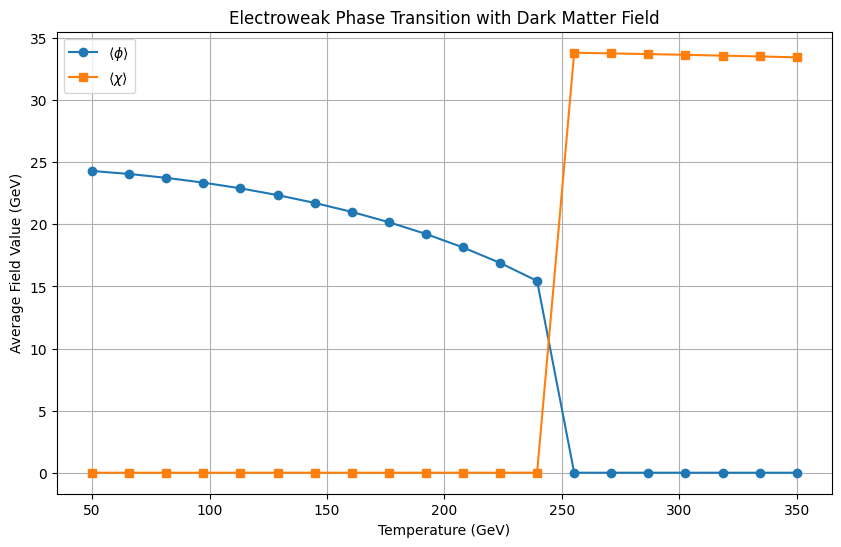

In [12]:
#Simulación principal

# Inicialización de los campos con valores aleatorios
phi = np.random.randn(N)  # Valores iniciales distribuidos normalmente para φ
chi = np.random.randn(N)  # Valores iniciales distribuidos normalmente para χ

# Rango de temperaturas a simular (de 50 a 350 GeV en 20 pasos)
temperatures = np.linspace(50, 350, 20)

# Almacenamiento de resultados
phi_avg = []  # Valores promedio de φ para cada temperatura
chi_avg = []  # Valores promedio de χ para cada temperatura

# Bucle principal sobre temperaturas
for T in temperatures:
    phi, chi = metropolis_hastings(phi, chi, T)  # Evolución de los campos
    phi_avg.append(np.mean(phi))  # Guardar el valor promedio de φ
    chi_avg.append(np.mean(chi))  # Guardar el valor promedio de χ

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(temperatures, phi_avg, 'o-', label='$\\langle \\phi \\rangle$')
plt.plot(temperatures, chi_avg, 's-', label='$\\langle \\chi \\rangle$')
plt.xlabel('Temperature (GeV)')
plt.ylabel('Average Field Value (GeV)')
plt.title('Electroweak Phase Transition with Dark Matter Field')
plt.legend()
plt.grid()
plt.show()